In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#from utils import test_case_checker

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df = pd.read_csv('../diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
def simple_pred_vec(g, theta):

    return g >= theta

print(simple_pred_vec(g=np.array([100., 200., 140.]), theta=140.))
assert (simple_pred_vec(g=np.array([100., 200., 140.]), theta=140.) == np.array([False, True, True])).all()

[False  True  True]


In [62]:
def simple_pred(df, theta):

    # your code here
    glucose = df['Glucose'].values[np.newaxis,]
    pred = simple_pred_vec(glucose, theta)

    return pred

#simple_pred(df, 120)
print(simple_pred(df, 120).shape)
assert np.array_equal(simple_pred(df, 120)[:,:5], np.array([[True, False,  True, False,  True]]))

(1, 768)


In [116]:
def simple_acc(df, theta):

    # your code here
    expected = df['Outcome'].values
    #print(expected.shape)
    pred = simple_pred(df, theta)
    #print(pred.shape)
    accu = np.sum(pred == expected, axis=1) / expected.shape[0]
    #print(accu.shape)
    #print(accu)

    return accu

# Performing sanity checks on your implementation

# Toy testing the shapes
assert simple_acc(df, theta=120).shape == (1,)
assert simple_acc(df, theta=np.array([50,100,300]).reshape(3,1)).shape == (3,)

# Toy testing the values
assert simple_acc(df, theta=120).round(3)==0.698
assert np.array_equal(simple_acc(df, theta=np.array([[50,100,20,40]]).T).round(3), [0.352, 0.564, 0.35 , 0.35 ])

print(simple_acc(df.iloc[:10, :], 117))

[0.9]


In [148]:
a = np.array([1,2,3,4]).reshape(1, -1) # "a" is a row vector
b = np.array([1,3,6]).reshape(-1, 1) # "b" is a column vector
c = (a == b)
d = (a * b)
e = (a + b)
f = (a > b)
print(f'a.shape is {a.shape}. b.shape is {b.shape}')
print(f'c.shape is {c.shape}. d.shape is {d.shape}. e.shape is {e.shape}. f.shape is {f.shape}.')
print('----------')
print('c is ')
print(c)
print('----------')
print('d is ')
print(d)
print('----------')
print('e is ')
print(e)
print('----------')
print('f is ')
print(f)
print('----------')

a = np.array([True,True,True,False]).reshape(1, -1) # "a" is a row vector
b = np.array([1,1,0]).reshape(-1, 1)
print(a)
print(b)
print(a*b)
print(np.sum(a*b))

a.shape is (1, 4). b.shape is (3, 1)
c.shape is (3, 4). d.shape is (3, 4). e.shape is (3, 4). f.shape is (3, 4).
----------
c is 
[[ True False False False]
 [False False  True False]
 [False False False False]]
----------
d is 
[[ 1  2  3  4]
 [ 3  6  9 12]
 [ 6 12 18 24]]
----------
e is 
[[ 2  3  4  5]
 [ 4  5  6  7]
 [ 7  8  9 10]]
----------
f is 
[[False  True  True  True]
 [False False False  True]
 [False False False False]]
----------
[[ True  True  True False]]
[[1]
 [1]
 [0]]
[[1 1 1 0]
 [1 1 1 0]
 [0 0 0 0]]
6


In [126]:
def best_theta_loopy(df):

    # your code here
    best_accuracy = 0
    best_theta = 1000
    for t in range(75, 201):
        accu = simple_acc(df, t)
        if  accu > best_accuracy:
            best_accuracy = accu
            best_theta = t
        elif accu == best_accuracy:
            best_theta = t if  t < best_theta else best_theta

    return np.array([best_theta, best_accuracy])

print(best_theta_loopy(df.iloc[:10, :]))
assert np.array_equal(best_theta_loopy(df.iloc[:10, :]), np.array((117, 0.9)))

[117 array([0.9])]


In [139]:
def best_theta(df):

    # your code here
    thetas = np.arange(75, 201)
    accus = simple_acc(df, thetas[:, np.newaxis])
    max_arg = np.argmax(accus)

    return np.array((thetas[max_arg], accus[max_arg]))

print(best_theta(df.iloc[:10, :]))
assert np.array_equal(best_theta(df.iloc[:10, :]), np.array((117, 0.9)))

[117.    0.9]


In [163]:
def simple_confusion(df, theta):

    # your code here
    label = df['Outcome'].values
    pred = simple_pred(df, theta)
    a = (np.array([0,1]).reshape(2,1) == pred).astype(np.int)
    b = (label.reshape(-1,1) == np.array([0, 1]).reshape(1,2)).astype(np.int)
    M = a @ b

    return M

print(simple_confusion(df.iloc[:100, :], theta=144))

[[55 24]
 [ 8 13]]


In [162]:
## This is neat trick to get all tp, tn, fp, fn
pred = np.array([True,False,True,False]).reshape(1,-1)
label = np.array([True,False,False,False]).reshape(1,-1)# "a" is a row vector
a = (np.array([0,1]).reshape(2,1) == pred).astype(np.int)
b = (label.reshape(-1,1) == np.array([0, 1]).reshape(1,2)).astype(np.int)
print(a)
print(b)
print(a @ b)

[[0 1 0 1]
 [1 0 1 0]]
[[0 1]
 [1 0]
 [1 0]
 [1 0]]
[[2 0]
 [1 1]]


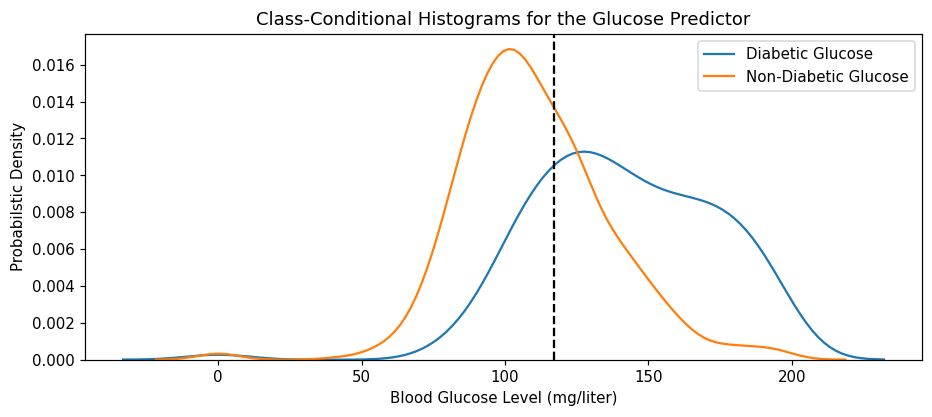

In [164]:
fig, ax = plt.subplots(figsize=(10,4), dpi=108)
sns.kdeplot(df['Glucose'][df['Outcome']==1].values, ax=ax, label='Diabetic Glucose')
sns.kdeplot(df['Glucose'][df['Outcome']==0].values, ax=ax, label='Non-Diabetic Glucose')
ax.set_xlabel('Blood Glucose Level (mg/liter)')
ax.set_ylabel('Probabilstic Density')
ax.set_title('Class-Conditional Histograms for the Glucose Predictor')
_=ax.axvline(x=117, c='black', ls='--')